## Filtering joins
1. Filter observation from two tables based on wheteher or not they match an obervation in another table

In [48]:
import pandas as pd

### Semi joins
1. Return the intersection, simmilar to inner join.
2. Return only column from the left table not right.
3. No duplicates

### Anti join
1. Returns the left table, excluding the intersection


In [49]:
employess = pd.read_csv('employess.csv')
employess.head()

,Unnamed: 0,srid,lname,fname,title,hire_date
0,0,1,Adams,Andrew,General manager,2002-08-14
1,1,2,Edwards,Nancy,Sales Manager,2002-05-01
2,2,3,Peacock,Jane,Sales support agent,2002-04-01
3,3,4,Park,Margaret,Sales support agent,2003-05-03
4,4,5,Johnson,Steve,Sales support agent,2003-05-03


In [50]:
top_cust = pd.read_csv('top_customer.csv')
top_cust.head()

,Unnamed: 0,cid,srid,fname,lname,phone,fax,email
0,0,1,3,Luís,Gonçalves,+55 (12) 3923-5555,+55 (12) 3923-5566,luisg@embraer.com.br
1,1,2,5,Leonie,Köhler,+49 0711 2842222,NaN,leonekohler@surfeu.de
2,2,3,3,François,Tremblay,+1 (514) 721-4711,NaN,ftremblay@gmail.com
3,3,4,4,Bjørn,Hansen,+47 22 44 22 22,NaN,bjorn.hansen@yahoo.no
4,4,5,4,František,Wichterlová,+420 2 4172 5555,+420 2 4172 5555,frantisekw@jetbrains.com


### Antijoin

In [51]:
## merge with left, indicator -> use to determine how merge
empl_cust = employess.merge(top_cust,on='srid',how='left',indicator=True)
empl_cust.head()

,Unnamed: 0_x,srid,lname_x,fname_x,title,hire_date,Unnamed: 0_y,cid,fname_y,lname_y,phone,fax,email,_merge
0,0,1,Adams,Andrew,General manager,2002-08-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
1,1,2,Edwards,Nancy,Sales Manager,2002-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
2,2,3,Peacock,Jane,Sales support agent,2002-04-01,0.0,1.0,Luís,Gonçalves,+55 (12) 3923-5555,+55 (12) 3923-5566,luisg@embraer.com.br,both
3,2,3,Peacock,Jane,Sales support agent,2002-04-01,2.0,3.0,François,Tremblay,+1 (514) 721-4711,NaN,ftremblay@gmail.com,both
4,2,3,Peacock,Jane,Sales support agent,2002-04-01,11.0,12.0,Roberto,Almeida,+55 (21) 2271-7000,+55 (21) 2271-7070,roberto.almeida@riotur.gov.br,both


In [52]:
## Genrate the list by choosing _merge to left_only
srid_list = empl_cust.loc[empl_cust['_merge']=='left_only','srid']
srid_list

0     1
1     2
61    6
62    7
63    8
Name: srid, dtype: int64

In [53]:
employess[employess['srid'].isin(srid_list)]

,Unnamed: 0,srid,lname,fname,title,hire_date
0,0,1,Adams,Andrew,General manager,2002-08-14
1,1,2,Edwards,Nancy,Sales Manager,2002-05-01
5,5,6,Mitchell,Michael,IT Manager,2003-10-17
6,6,7,King,Robert,IT Staff,2004-01-02
7,7,8,Callahan,LAursa,It Staff,2004-01-02


### Semi Join

In [54]:
non_mus_tcks = pd.read_csv('non_mus_tcks.csv')
non_mus_tcks.head()

,Unnamed: 0,tid,title,series_id,season,episode,price
0,0,2820,Occupation / Precipice,227,3,19,1.99
1,1,2821,"Exodus, Pt. 1",227,3,19,1.99
2,2,2822,"Exodus, Pt. 2",227,3,19,1.99
3,3,2823,Collaborators,227,3,19,1.99
4,4,2824,Torn,227,3,19,1.99


In [55]:
top_invoices = pd.read_csv('top_invoices.csv')
top_invoices.head()

,Unnamed: 0,tid,liid,iid,uprice,quantity
0,0,2832,470,88,1.99,1
1,1,2850,473,88,1.99,1
2,2,2868,476,88,1.99,1
3,3,3214,527,96,1.99,1
4,4,3223,528,96,1.99,1


In [56]:
genres = pd.read_csv('genres.csv')

In [57]:
## 1. Merge
tracks_invoices = non_mus_tcks.merge(top_invoices,on='tid')
tracks_invoices.head()

,Unnamed: 0_x,tid,title,series_id,season,episode,price,Unnamed: 0_y,liid,iid,uprice,quantity
0,19,2850,Distractions,228,3,21,1.99,1,473,88,1.99,1
1,19,2850,Distractions,228,3,21,1.99,13,2192,404,1.99,1
2,37,2868,...And Found,231,3,19,1.99,2,476,88,1.99,1
3,37,2868,...And Found,231,3,19,1.99,14,2194,404,1.99,1


In [58]:
top_tracks = non_mus_tcks[non_mus_tcks['tid'].isin(tracks_invoices['tid'])]
top_tracks.head()

,Unnamed: 0,tid,title,series_id,season,episode,price
19,19,2850,Distractions,228,3,21,1.99
37,37,2868,...And Found,231,3,19,1.99


In [59]:
cnt_by_gid = top_tracks.groupby('episode',as_index=False).agg({'tid':'count'})
cnt_by_gid

,episode,tid
0,19,1
1,21,1


In [60]:
cnt_by_gid.merge(genres,left_on='episode',right_on='gid')

,episode,tid,Unnamed: 0,gid,name
0,19,1,18,19,TV Shows
1,21,1,20,21,Drama


## Concat vertically

In [61]:
df = {
    'tid':[1853,1854,1857],
    'name':['Battery','Master of puppets','Disposable Heroes'],
    'aid':[152,152,152],
    'mtid':[1,1,1],
    'gid':[3,3,3],
    'composer':['J','K','J'],
    'u_price':[0.99,0.99,0.99]
}

tracks_master = pd.DataFrame(df)
tracks_master

,tid,name,aid,mtid,gid,composer,u_price
0,1853,Battery,152,1,3,J,0.99
1,1854,Master of puppets,152,1,3,K,0.99
2,1857,Disposable Heroes,152,1,3,J,0.99


In [62]:
df = {
    'tid':[1874,1875,1876,1877,1878],
    'name':['Fire Fire with fire','Ride the lighting','For whom the bell tolls','Fade to black','Trapped under ice'],
    'aid':[154,154,154,154,154],
    'mtid':[1,1,1,1,1],
    'gid':[3,3,3,3,3],
    'u_price':[0.99,0.99,0.99,0.99,0.99]
}

tracks_ride = pd.DataFrame(df)
tracks_ride.head()

,tid,name,aid,mtid,gid,u_price
0,1874,Fire Fire with fire,154,1,3,0.99
1,1875,Ride the lighting,154,1,3,0.99
2,1876,For whom the bell tolls,154,1,3,0.99
3,1877,Fade to black,154,1,3,0.99
4,1878,Trapped under ice,154,1,3,0.99


In [63]:
df = {
    'tid':[1882,1883,1884,1885,1886],
    'name':['Frantic','St. anger','Some kind of monster','Dirty window','Invissible kid'],
    'aid':[155,155,155,155,155],
    'mtid':[1,1,1,1,1],
    'gid':[3,3,3,3,3],
    'u_price':[0.99,0.99,0.99,0.99,0.99]
}
tracks_st = pd.DataFrame(df)
tracks_st

,tid,name,aid,mtid,gid,u_price
0,1882,Frantic,155,1,3,0.99
1,1883,St. anger,155,1,3,0.99
2,1884,Some kind of monster,155,1,3,0.99
3,1885,Dirty window,155,1,3,0.99
4,1886,Invissible kid,155,1,3,0.99


In [64]:
tracks_for_albums = pd.concat([tracks_master,tracks_ride,tracks_st],sort=True)
tracks_for_albums

,aid,composer,gid,mtid,name,tid,u_price
0,152,J,3,1,Battery,1853,0.99
1,152,K,3,1,Master of puppets,1854,0.99
2,152,J,3,1,Disposable Heroes,1857,0.99
0,154,NaN,3,1,Fire Fire with fire,1874,0.99
1,154,NaN,3,1,Ride the lighting,1875,0.99
2,154,NaN,3,1,For whom the bell tolls,1876,0.99
3,154,NaN,3,1,Fade to black,1877,0.99
4,154,NaN,3,1,Trapped under ice,1878,0.99
0,155,NaN,3,1,Frantic,1882,0.99
1,155,NaN,3,1,St. anger,1883,0.99


In [65]:
## ignore index
tracks_for_albums = pd.concat([tracks_master,tracks_ride,tracks_st],ignore_index=True,sort=True)
tracks_for_albums

,aid,composer,gid,mtid,name,tid,u_price
0,152,J,3,1,Battery,1853,0.99
1,152,K,3,1,Master of puppets,1854,0.99
2,152,J,3,1,Disposable Heroes,1857,0.99
3,154,NaN,3,1,Fire Fire with fire,1874,0.99
4,154,NaN,3,1,Ride the lighting,1875,0.99
5,154,NaN,3,1,For whom the bell tolls,1876,0.99
6,154,NaN,3,1,Fade to black,1877,0.99
7,154,NaN,3,1,Trapped under ice,1878,0.99
8,155,NaN,3,1,Frantic,1882,0.99
9,155,NaN,3,1,St. anger,1883,0.99


In [66]:
## present in all table
tracks_for_albums = pd.concat([tracks_master,tracks_ride,tracks_st],sort=True,join='inner')
tracks_for_albums

,aid,gid,mtid,name,tid,u_price
0,152,3,1,Battery,1853,0.99
1,152,3,1,Master of puppets,1854,0.99
2,152,3,1,Disposable Heroes,1857,0.99
0,154,3,1,Fire Fire with fire,1874,0.99
1,154,3,1,Ride the lighting,1875,0.99
2,154,3,1,For whom the bell tolls,1876,0.99
3,154,3,1,Fade to black,1877,0.99
4,154,3,1,Trapped under ice,1878,0.99
0,155,3,1,Frantic,1882,0.99
1,155,3,1,St. anger,1883,0.99


In [67]:
## keys 
tracks_for_albums = pd.concat([tracks_master,tracks_ride,tracks_st],keys=['1','2','3'],sort=True)
tracks_for_albums

aid composer  gid  mtid                     name   tid  u_price
1 0  152        J    3     1                  Battery  1853     0.99
  1  152        K    3     1        Master of puppets  1854     0.99
  2  152        J    3     1        Disposable Heroes  1857     0.99
2 0  154      NaN    3     1      Fire Fire with fire  1874     0.99
  1  154      NaN    3     1        Ride the lighting  1875     0.99
  2  154      NaN    3     1  For whom the bell tolls  1876     0.99
  3  154      NaN    3     1            Fade to black  1877     0.99
  4  154      NaN    3     1        Trapped under ice  1878     0.99
3 0  155      NaN    3     1                  Frantic  1882     0.99
  1  155      NaN    3     1                St. anger  1883     0.99
  2  155      NaN    3     1     Some kind of monster  1884     0.99
  3  155      NaN    3     1             Dirty window  1885     0.99
  4  155      NaN    3     1           Invissible kid  1886     0.99

<Axes: >

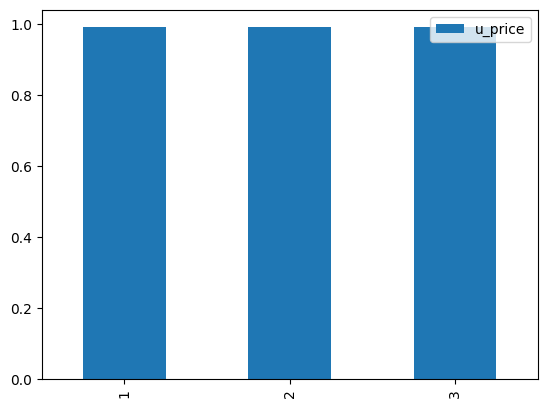

In [69]:
tracks_for_albums.groupby(level=0).agg({'u_price':'mean'}).plot(kind='bar')

## Verifying integrity

In [71]:
df = {
    'tid':[2,3,4],
    'name':['Balls','Fast','Restless'],
    'aid':[2,3,3],
    'mtid':[2,2,2],
    'gid':[1,1,1],
    'u_price':[0.99,0.99,0.99]
}
tracks = pd.DataFrame(df)
tracks

,tid,name,aid,mtid,gid,u_price
0,2,Balls,2,2,1,0.99
1,3,Fast,3,2,1,0.99
2,4,Restless,3,2,1,0.99


In [72]:
df = {
    'tid':[2,3,2],
    'ms':[342526,230619,252051],
    'bytes':[5510324,3990994,4331889]
}

specs = pd.DataFrame(df)
specs

,tid,ms,bytes
0,2,342526,5510324
1,3,230619,3990994
2,2,252051,4331889


In [73]:
tracks.merge(specs,on='tid',validate='one_to_one')

MergeError: Merge keys are not unique in right dataset; not a one-to-one merge

In [74]:
tracks.merge(specs,on='tid',validate='one_to_many')

,tid,name,aid,mtid,gid,u_price,ms,bytes
0,2,Balls,2,2,1,0.99,342526,5510324
1,2,Balls,2,2,1,0.99,252051,4331889
2,3,Fast,3,2,1,0.99,230619,3990994
